In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)
dataset=pd.read_csv('ai4i2020.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(10000, 14)


In [2]:
## print the top5 records
dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
dataset.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
#creating a copy to do pre-processing

df = dataset.copy()

In [5]:
#dropping two columns type and product ID as they were redundant
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [6]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Preprocessing

#### simple one hot encoding

In [7]:
df = pd.get_dummies(df,columns=['Type'])

In [8]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1,0,0


In [9]:
def undummy(cols):
    twf = cols[0]
    hdf = cols[1]
    pwf = cols[2]
    osf = cols[3]
    rnf = cols[4]
    if twf==1:
        return 'TWF'
    elif hdf == 1:
        return 'HDF'
    elif pwf==1:
        return 'PDF'
    elif osf==1:
        return 'OSF'
    elif rnf==1:
        return 'RNF'
    else:
        return 'Healthy'

In [10]:
df['Target'] = df[['TWF','HDF','PWF','OSF','RNF']].apply(undummy,axis=1)

In [11]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Target
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1,Healthy
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0,Healthy
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0,Healthy
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0,Healthy
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,1,Healthy
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1,0,0,Healthy
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,1,Healthy
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1,0,0,Healthy


In [12]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [13]:
df['Target'].value_counts()

Healthy    9652
HDF         115
PDF          91
OSF          78
TWF          46
RNF          18
Name: Target, dtype: int64

In [14]:
100 * df['Target'].value_counts()/len(df)  

Healthy    96.52
HDF         1.15
PDF         0.91
OSF         0.78
TWF         0.46
RNF         0.18
Name: Target, dtype: float64

In [15]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H',
       'Type_L', 'Type_M', 'Target'],
      dtype='object')

In [16]:
X = df.drop(['Machine failure','Target'],axis=1)
y = df['Machine failure']

In [17]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,1,0,0


In [18]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [19]:
import seaborn as sns

<AxesSubplot:>

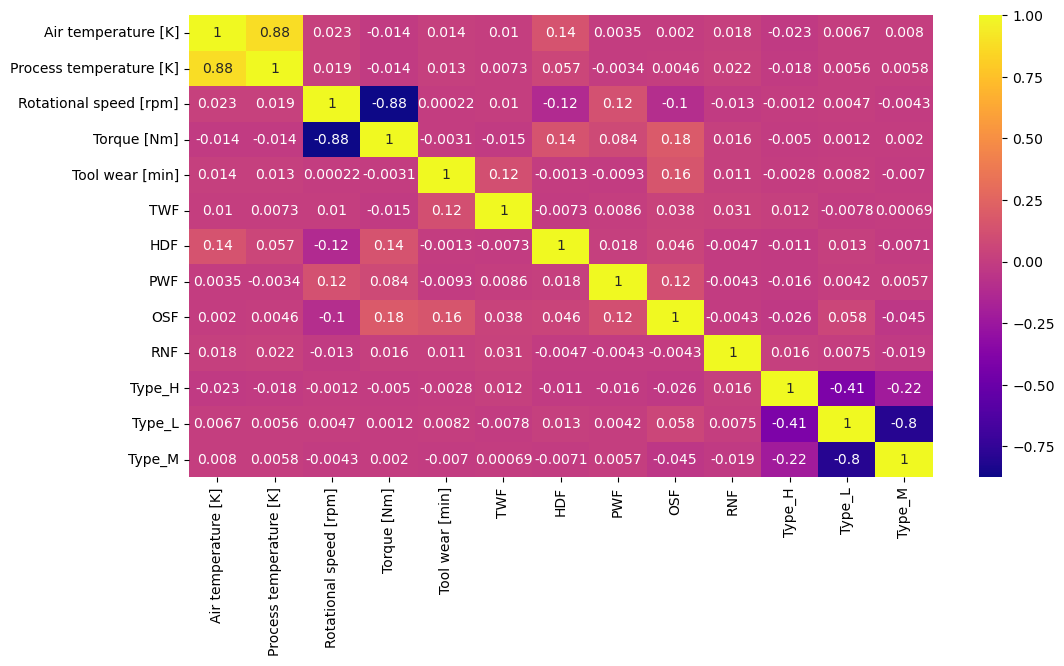

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), annot=True, cmap='plasma')

### The above heatmap shows us that Air Temp and Process Temp are highly correlated. 

In [21]:
X.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

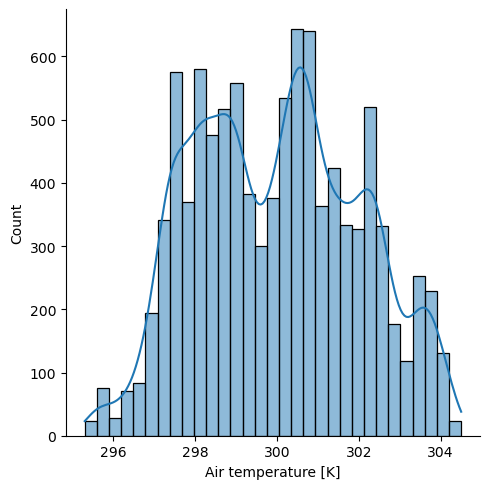

<Figure size 1200x600 with 0 Axes>

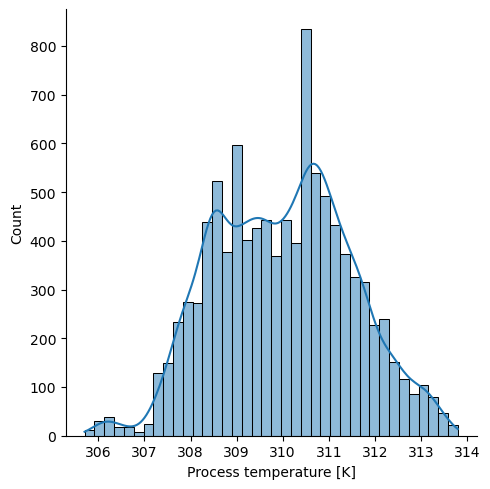

<Figure size 1200x600 with 0 Axes>

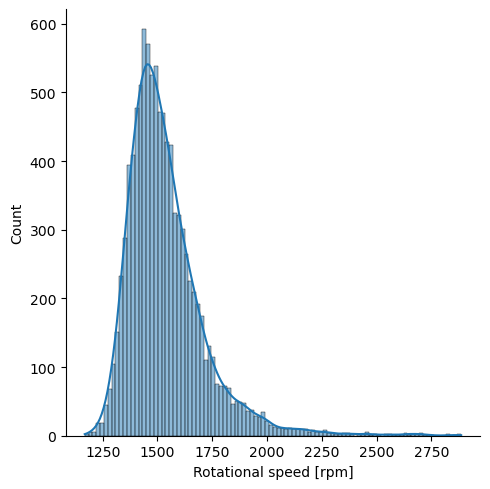

<Figure size 1200x600 with 0 Axes>

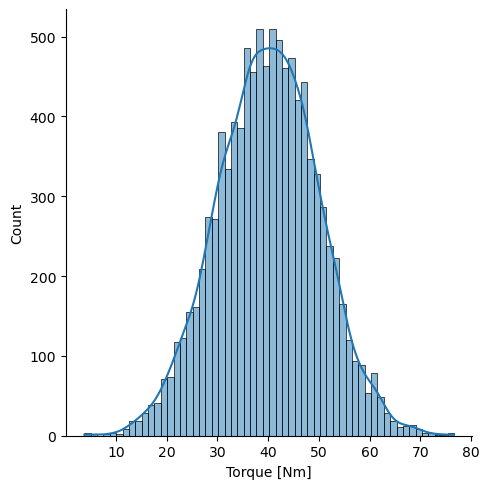

<Figure size 1200x600 with 0 Axes>

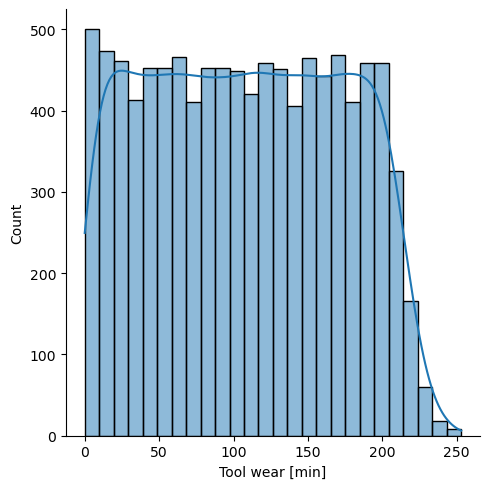

In [22]:
num_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for i in num_cols:
    plt.figure(figsize=(12,6))
    sns.displot(data=X,x=i,kde=True)
    plt.show()

In [23]:
#number of outlier per columns

for i in num_cols:
    print(i)
    print(len(X[X[i] > (X[i].mean() + 3 * X[i].std())]))
    print('\n')

Air temperature [K]
0


Process temperature [K]
0


Rotational speed [rpm]
164


Torque [Nm]
14


Tool wear [min]
0




### Since 164*100/10000 = 1.64%. Now, we know that 1.64% of our data in rpm column are outliers, as they do not fall under 99.7% of distribution. But we will retain these values as they could be potential indicator of machine failing.

In [24]:
# splitting dataset to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
8371,298.7,309.7,1881,21.7,29,0,0,0,0,0,0,1,0
5027,304.0,313.3,1294,54.6,102,0,0,0,0,0,0,1,0
9234,298.3,309.1,1904,20.3,140,0,0,0,0,0,0,1,0
3944,302.2,311.2,1381,49.4,207,0,0,0,0,0,0,1,0
6862,301.1,311.2,1384,49.4,48,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,302.3,311.8,1369,56.2,208,0,0,0,1,0,0,1,0
5191,304.0,313.2,1416,46.0,128,0,0,0,0,0,0,1,0
5390,302.8,312.3,1483,47.2,223,0,0,0,0,0,1,0,0
860,296.1,306.9,1541,32.6,33,0,0,0,0,0,1,0,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [29]:
print("Train x shape: {}".format(X_train.shape))
print("Train y shape: {}".format(y_train.shape))
print("Test x shape: {}".format(X_test.shape))
print("Test y shape: {}".format(y_test.shape))

Train x shape: (6700, 13)
Train y shape: (6700,)
Test x shape: (3300, 13)
Test y shape: (3300,)


In [30]:
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression

#linear_reg = LinearRegression().fit(x_train, y_train)
# log_reg = LogisticRegression().fit(x_train, y_train)

In [31]:
lr = LogisticRegression(max_iter=1000000)
lin_reg = LinearRegression()

In [32]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000000)

In [33]:
lr_pred = lr.predict(X_test_scaled)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [35]:
print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(f"F1- Score: {f1_score(y_test,lr_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test,lr_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      0.97      0.98       101

    accuracy                           1.00      3300
   macro avg       1.00      0.99      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3199    0]
 [   3   98]]
F1- Score: 0.9849246231155778
Accuracy Score: 0.9990909090909091


In [36]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [37]:
lin_reg_pred = lin_reg.predict(X_test_scaled)

In [38]:
lin_reg_pred

array([1.81647190e-03, 9.75979467e-05, 2.25894577e-03, ...,
       2.02164844e-03, 5.88585810e-03, 1.58993782e-03])

In [39]:
lin_reg_pred.max()

1.8332573711465798

In [40]:
lin_reg_pred.min()

-0.006939544631227312

<AxesSubplot:ylabel='Frequency'>

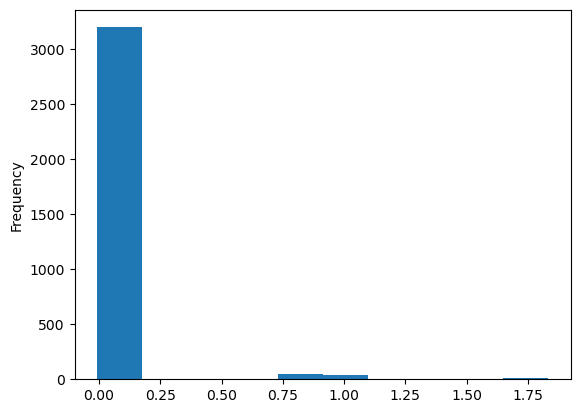

In [41]:
pd.Series(lin_reg_pred).plot(kind='hist')

In [42]:
lin_reg_pred_final = np.where(lin_reg_pred < 0.5, 0, 1)

In [43]:
lin_reg_pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print(classification_report(y_test,lin_reg_pred_final))
print(confusion_matrix(y_test,lin_reg_pred_final))
print(f"F1- Score: {f1_score(y_test,lin_reg_pred_final)}")
print(f"Accuracy Score: {accuracy_score(y_test,lin_reg_pred_final)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      0.97      0.98       101

    accuracy                           1.00      3300
   macro avg       1.00      0.99      0.99      3300
weighted avg       1.00      1.00      1.00      3300

[[3199    0]
 [   3   98]]
F1- Score: 0.9849246231155778
Accuracy Score: 0.9990909090909091


In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [47]:
gnb.fit(X_train_scaled,y_train)
#mnb.fit(X_train_scaled,y_train)

GaussianNB()

In [48]:
gnb_pred = gnb.predict(X_test_scaled)

In [49]:
print(classification_report(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))
print(f"F1- Score: {f1_score(y_test,gnb_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test,gnb_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       0.92      0.97      0.95       101

    accuracy                           1.00      3300
   macro avg       0.96      0.98      0.97      3300
weighted avg       1.00      1.00      1.00      3300

[[3191    8]
 [   3   98]]
F1- Score: 0.9468599033816426
Accuracy Score: 0.9966666666666667


### Conclusion:
We ran all the mentioned algorithms namily Linear Regression, Logistic Regression and Naive Bayes. We figured out that Logistic & Linear regression outperformed Naive Bayes, because the data was easily linearly seperable. Hence, linear model works the best, however, if we were to deploy the model into production environment I would choose Logistic Regression because Linear Regression is highly suscepctible to outliers. 